# 1. Software Requirements

In [65]:
# Libraries for data manipulation.
import pandas as pd
import numpy as np

# Libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Libraries for quarto rending
from IPython.display import Markdown,display
from tabulate import tabulate
import plotly.io as pio

# Remove warnings.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 2. Regional Giving Data IRS eo1

## 2.1. General Summary

In [66]:
# Read in data.
df_reg_giv_irs_eo1 = pd.read_csv('././Data/Regional Giving Data IRS eo1.csv')

# Print data dimensions.
shape_caption = "Table 1: Data Dimensions"
shape_df = pd.DataFrame({
        'Dimension': ['Rows','Columns'],
        'Count': [df_reg_giv_irs_eo1.shape[0], df_reg_giv_irs_eo1.shape[1]]
    })
shape_df['Count'] = shape_df['Count'].apply(lambda x: f"{x:,}")
shape_markdown = shape_caption + "\n\n" + shape_df.to_markdown(index=False)
display(Markdown(shape_markdown))

# Print a sample of the data.
first_five_rows_caption = "Table 2: First Five Rows of Data"
first_five_rows_markdown = first_five_rows_caption + "\n\n" + df_reg_giv_irs_eo1.head().to_markdown(index=False)
display(Markdown(first_five_rows_markdown))

# Print metadata.
metadata_caption = "Table 3: Metadata"
column_metadata = []

for col in df_reg_giv_irs_eo1.columns:
    # Gather metadata for each col.
    col_metadata = {
        'Column Name': col,
        'Data Type': str(df_reg_giv_irs_eo1[col].dtype),
        'Unique Values': df_reg_giv_irs_eo1[col].nunique(),
        'Missing Values': df_reg_giv_irs_eo1[col].isnull().sum()
    }
    # Append metadata to list.
    column_metadata.append(col_metadata)

# Convert list to pd df and then markdown table.
metadata_df = pd.DataFrame(column_metadata)
metadata_df['Unique Values'] = metadata_df['Unique Values'].apply(lambda x: f"{x:,}")
metadata_df['Missing Values'] = metadata_df['Missing Values'].apply(lambda x: f"{x:,}")
metadata_markdown = metadata_caption + "\n\n" + metadata_df.to_markdown(index=False)
display(Markdown(metadata_markdown))

Table 1: Data Dimensions

| Dimension   | Count   |
|:------------|:--------|
| Rows        | 267,136 |
| Columns     | 28      |

Table 2: First Five Rows of Data

|    EIN | NAME                                             |   ICO | STREET                       | CITY         | STATE   | ZIP        |   GROUP |   SUBSECTION |   AFFILIATION |   CLASSIFICATION |   RULING |   DEDUCTIBILITY |   FOUNDATION |   ACTIVITY |   ORGANIZATION |   STATUS |   TAX_PERIOD |   ASSET_CD |   INCOME_CD |   FILING_REQ_CD |   PF_FILING_REQ_CD |   ACCT_PD |   ASSET_AMT |   INCOME_AMT |   REVENUE_AMT | NTEE_CD   |   SORT_NAME |
|-------:|:-------------------------------------------------|------:|:-----------------------------|:-------------|:--------|:-----------|--------:|-------------:|--------------:|-----------------:|---------:|----------------:|-------------:|-----------:|---------------:|---------:|-------------:|-----------:|------------:|----------------:|-------------------:|----------:|------------:|-------------:|--------------:|:----------|------------:|
|  19818 | PALMER SECOND BAPTIST CHURCH                     |   nan | 1050 THORNDIKE ST            | PALMER       | MA      | 01069-1507 |    3125 |            3 |             9 |             7000 |   195504 |               1 |           10 |    1000000 |              5 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | nan       |        3514 |
|  29215 | ST GEORGE CATHEDRAL                              |   nan | 523 E BROADWAY               | SOUTH BOSTON | MA      | 02127-4415 |    2365 |            3 |             9 |             7000 |   197210 |               1 |           10 |    1000000 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | nan       |         nan |
| 587764 | IGLESIA BETHESDA INC                             |   nan | 13 CUMMINGHAM ST             | LOWELL       | MA      | 01852-0000 |       0 |            3 |             3 |             7000 |   200401 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 635913 | MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC |   nan | 454 ESSEX ST                 | LAWRENCE     | MA      | 01840-1242 |       0 |            3 |             3 |             7000 |   200401 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 765634 | MERCY CHAPEL INTERNATIONAL                       |   nan | 75 MORTON VILLAGE DR APT 408 | MATTAPAN     | MA      | 02126-2433 |       0 |            3 |             3 |             7000 |   200404 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X20       |         nan |

Table 3: Metadata

| Column Name      | Data Type   | Unique Values   | Missing Values   |
|:-----------------|:------------|:----------------|:-----------------|
| EIN              | int64       | 267,136         | 0                |
| NAME             | object      | 230,144         | 0                |
| ICO              | object      | 150,373         | 97,108           |
| STREET           | object      | 182,953         | 0                |
| CITY             | object      | 4,766           | 0                |
| STATE            | object      | 8               | 0                |
| ZIP              | object      | 196,389         | 0                |
| GROUP            | int64       | 1,516           | 0                |
| SUBSECTION       | int64       | 28              | 0                |
| AFFILIATION      | int64       | 8               | 0                |
| CLASSIFICATION   | int64       | 146             | 0                |
| RULING           | int64       | 1,241           | 0                |
| DEDUCTIBILITY    | int64       | 4               | 0                |
| FOUNDATION       | int64       | 20              | 0                |
| ACTIVITY         | int64       | 9,955           | 0                |
| ORGANIZATION     | int64       | 7               | 0                |
| STATUS           | int64       | 4               | 0                |
| TAX_PERIOD       | float64     | 211             | 50,071           |
| ASSET_CD         | int64       | 10              | 0                |
| INCOME_CD        | int64       | 10              | 0                |
| FILING_REQ_CD    | int64       | 8               | 0                |
| PF_FILING_REQ_CD | int64       | 4               | 0                |
| ACCT_PD          | int64       | 13              | 0                |
| ASSET_AMT        | float64     | 104,745         | 52,430           |
| INCOME_AMT       | float64     | 99,571          | 52,430           |
| REVENUE_AMT      | float64     | 82,077          | 76,224           |
| NTEE_CD          | object      | 2,938           | 80,923           |
| SORT_NAME        | object      | 51,987          | 212,833          |

## 2.2. Statistical Summary

In [67]:
pd.options.display.float_format = '{:,.2f}'.format
stat_sum_caption = "Table 4: Statistical Summary"
stat_sum_markdown = stat_sum_caption + "\n\n" + df_reg_giv_irs_eo1.describe().applymap(lambda x: f"{x:,.2f}").to_markdown(index=False)
display(Markdown(stat_sum_markdown))

/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_98754/22617926.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stat_sum_markdown = stat_sum_caption + "\n\n" + df_reg_giv_irs_eo1.describe().applymap(lambda x: f"{x:,.2f}").to_markdown(index=False)


Table 4: Statistical Summary

| EIN            | GROUP      | SUBSECTION   | AFFILIATION   | CLASSIFICATION   | RULING     | DEDUCTIBILITY   | FOUNDATION   | ACTIVITY       | ORGANIZATION   | STATUS     | TAX_PERIOD   | ASSET_CD   | INCOME_CD   | FILING_REQ_CD   | PF_FILING_REQ_CD   | ACCT_PD    | ASSET_AMT         | INCOME_AMT        | REVENUE_AMT       |
|:---------------|:-----------|:-------------|:--------------|:-----------------|:-----------|:----------------|:-------------|:---------------|:---------------|:-----------|:-------------|:-----------|:------------|:----------------|:-------------------|:-----------|:------------------|:------------------|:------------------|
| 267,136.00     | 267,136.00 | 267,136.00   | 267,136.00    | 267,136.00       | 267,136.00 | 267,136.00      | 267,136.00   | 267,136.00     | 267,136.00     | 267,136.00 | 217,065.00   | 267,136.00 | 267,136.00  | 267,136.00      | 267,136.00         | 267,136.00 | 214,706.00        | 214,706.00        | 190,912.00        |
| 378,834,670.79 | 437.87     | 3.97         | 4.04          | 2,099.81         | 198,632.20 | 1.11            | 10.85        | 122,954,143.06 | 1.80           | 1.05       | 202,151.79   | 1.95       | 1.79        | 2.12            | 0.10               | 10.13      | 8,412,815.72      | 4,918,212.63      | 3,663,787.81      |
| 302,216,335.83 | 1,414.89   | 5.02         | 2.29          | 1,993.07         | 15,051.45  | 0.36            | 6.12         | 251,390,261.37 | 1.57           | 0.84       | 138.34       | 2.56       | 2.37        | 1.88            | 0.30               | 2.91       | 284,811,159.26    | 151,694,731.50    | 99,541,115.77     |
| 19,818.00      | 0.00       | 0.00         | 0.00          | 0.00             | 0.00       | 0.00            | 0.00         | 0.00           | 0.00           | 1.00       | 198,812.00   | 0.00       | 0.00        | 0.00            | 0.00               | 0.00       | 0.00              | -1,753,425.00     | -46,780,468.00    |
| 133,973,617.25 | 0.00       | 3.00         | 3.00          | 1,000.00         | 198,303.00 | 1.00            | 4.00         | 0.00           | 1.00           | 1.00       | 202,112.00   | 0.00       | 0.00        | 1.00            | 0.00               | 8.00       | 0.00              | 0.00              | 0.00              |
| 237,362,929.50 | 0.00       | 3.00         | 3.00          | 1,000.00         | 200,505.00 | 1.00            | 15.00        | 0.00           | 1.00           | 1.00       | 202,206.00   | 0.00       | 0.00        | 2.00            | 0.00               | 12.00      | 5,989.00          | 3,000.00          | 0.00              |
| 736,107,573.25 | 0.00       | 3.00         | 3.00          | 2,000.00         | 201,611.00 | 1.00            | 15.00        | 90,000,000.00  | 1.00           | 1.00       | 202,212.00   | 4.00       | 4.00        | 2.00            | 0.00               | 12.00      | 380,038.25        | 206,526.00        | 145,756.25        |
| 996,082,178.00 | 9,706.00   | 92.00        | 9.00          | 9,510.00         | 202,306.00 | 4.00            | 25.00        | 999,000,000.00 | 6.00           | 25.00      | 202,306.00   | 9.00       | 9.00        | 14.00           | 3.00               | 12.00      | 54,599,818,948.00 | 42,081,770,632.00 | 19,858,151,933.00 |

## 2.3. Number of Northeast Exempt Organizations

In [68]:
print(format(df_reg_giv_irs_eo1.shape[0], ","))


267,136


## 2.4. Subsection & Classification Information


"Subsection Codes are the codes shown under section 501(c) of the Internal Revenue Code of 1986, which define the
category under which an organization may be exempt. A table of subsection and classification codes (which reflects a
further breakdown of the Internal Revenue Code subsections) can be found in the section entitled "Table of EO Subsection and Classification Codes" (below). One to four different classification codes may be present." - https://www.irs.gov/pub/irs-soi/eo-info.pdf

Quality Control Check: CLASSIFICATION field is not clear. Confirm if 7000 should be interpreted as 7. Some fields not in CLASSIFICIATION code documentation such as 9510 (there is no 9 classification code). It only goes up to 8 in the documentation. 

In [69]:
print("Example of subsection and classifiation data for various Employer Identification Numbers:")
df_reg_giv_irs_eo1[['EIN','SUBSECTION','CLASSIFICATION']].tail(5)

Example of subsection and classifiation data for various Employer Identification Numbers:


,EIN,SUBSECTION,CLASSIFICATION
267131,990384215,3,1000
267132,990384539,3,1000
267133,990536495,3,1000
267134,996078202,3,1000
267135,996082178,3,1000


In [70]:
print("Value counts for classification:")
df_reg_giv_irs_eo1['CLASSIFICATION'].value_counts().to_frame(name='Number of orgs.').T

Value counts for classification:


CLASSIFICATION,1000,2000,7000,1200,3000,1700,2100,1270,7100,4000,...,7231,1470,9510,2510,3800,2150,9100,1287,2367,2560
Number of orgs.,138227,34793,32520,27399,13102,4601,2278,2100,1170,1165,...,1,1,1,1,1,1,1,1,1,1


## 2.5. National Taxonomy of Exempt Entities (NTEE) Code Information:

"The National Taxonomy of Exempt Entities (NTEE) Code is a four-digit code used to classify an exempt organization in
terms of its primary exempt activity. A table of the codes found in the first three digits can be found below. The first digit (Common Code) is a modifier used to describe activities in support of nonprofit organizations. The fourth digit further defines the classification of the organization and is not defined here." - https://www.irs.gov/pub/irs-soi/eo-info.pdf



In [71]:
print("Example of NTEE data for various Employer Identification Numbers:")
df_reg_giv_irs_eo1[['EIN','NTEE_CD']].head(5)

Example of NTEE data for various Employer Identification Numbers:


,EIN,NTEE_CD
0,19818,NaN
1,29215,NaN
2,587764,X21
3,635913,X21
4,765634,X20


In [72]:
ntee_mapping = {
    'A': 'Arts, Culture and Humanities',
    'B': 'Education',
    'C': 'Environment',
    'D': 'Animal-Related',
    'E': 'Health Care',
    'F': 'Mental Health & Crisis Intervention',
    'G': 'Voluntary Health Associations & Medical Disciplines',
    'H': 'Medical Research',
    'I': 'Crime & Legal-Related',
    'J': 'Employment',
    'K': 'Food, Agriculture and Nutrition',
    'L': 'Housing & Shelter',
    'M': 'Public Safety, Disaster Preparedness and Relief',
    'N': 'Recreation & Sports',
    'O': 'Youth Development',
    'P': 'Human Services',
    'Q': 'International, Foreign Affairs and National Security',
    'R': 'Civil Rights, Social Action & Advocacy',
    'S': 'Community Improvement & Capacity Building',
    'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
    'U': 'Science & Technology',
    'V': 'Social Science',
    'W': 'Public & Societal Benefit',
    'X': 'Religion-Related',
    'Y': 'Mutual & Membership Benefit',
    'Z': 'Unknown'
}

# Extract the first letter of NTEE_CD and map it to its description
df_reg_giv_irs_eo1['CATEGORY'] = df_reg_giv_irs_eo1['NTEE_CD'].str[0]
df_reg_giv_irs_eo1['CATEGORY_DESC'] = df_reg_giv_irs_eo1['CATEGORY'].map(ntee_mapping)

print("NTEE CODE DISTRIBUTION:\n")
df_reg_giv_irs_eo1['CATEGORY_DESC'].value_counts().to_frame(name="Number of orgs").T

NTEE CODE DISTRIBUTION:



CATEGORY_DESC,Education,Religion-Related,"Arts, Culture and Humanities","Philanthropy, Voluntarism and Grantmaking Foundations",Human Services,Recreation & Sports,Community Improvement & Capacity Building,Health Care,Youth Development,Animal-Related,...,Mutual & Membership Benefit,Employment,Voluntary Health Associations & Medical Disciplines,"Food, Agriculture and Nutrition",Crime & Legal-Related,"Civil Rights, Social Action & Advocacy",Unknown,Medical Research,Science & Technology,Social Science
Number of orgs,25094,24718,20030,19366,18092,13866,8801,6608,5497,4684,...,2586,2536,2347,2113,1585,1497,1358,1157,789,305


In [73]:
ntee_env_mapping = {
    "C01": "Alliance/Advocacy Organizations",
    "C02": "Management & Technical Assistance",
    "C03": "Professional Societies, Associations",
    "C05": "Research Institutes and/or Public Policy Analysis",
    "C11": "Single Organization Support",
    "C12": "Fund Raising and/or Fund Distribution",
    "C19": "Nonmonetary Support N.E.C.",
    "C20": "Pollution Abatement and Control Services",
    "C27": "Recycling Programs",
    "C30": "Natural Resources Conservation and Protection",
    "C32": "Water Resource, Wetlands Conservation and Management",
    "C34": "Land Resources Conservation",
    "C35": "Energy Resources Conservation and Development",
    "C36": "Forest Conservation",
    "C40": "Botanical, Horticultural, and Landscape Services",
    "C41": "Botanical Gardens, Arboreta and Botanical Organizations",
    "C42": "Garden Club, Horticultural Program",
    "C50": "Environmental Beautification and Aesthetics",
    "C60": "Environmental Education and Outdoor Survival Programs",
    "C99": "Environmental Quality, Protection, and Beautification N.E.C."
    }

df_reg_giv_irs_eo1['ENV_CATEGORY'] = df_reg_giv_irs_eo1['NTEE_CD'].str[0:3]
df_reg_giv_irs_eo1['ENVIRONMENT_DESC'] = df_reg_giv_irs_eo1['ENV_CATEGORY'].map(ntee_env_mapping)

print("ENVIRONMENT NTEE CODE DISTRIBUTION:\n")
df_reg_giv_irs_eo1['ENVIRONMENT_DESC'].value_counts().to_frame(name="Number of orgs").T

ENVIRONMENT NTEE CODE DISTRIBUTION:



ENVIRONMENT_DESC,Natural Resources Conservation and Protection,"Water Resource, Wetlands Conservation and Management","Garden Club, Horticultural Program",Land Resources Conservation,Environmental Education and Outdoor Survival Programs,"Environmental Quality, Protection, and Beautification N.E.C.",Environmental Beautification and Aesthetics,Alliance/Advocacy Organizations,Pollution Abatement and Control Services,Energy Resources Conservation and Development,Recycling Programs,"Botanical Gardens, Arboreta and Botanical Organizations",Research Institutes and/or Public Policy Analysis,"Professional Societies, Associations",Single Organization Support,Fund Raising and/or Fund Distribution,Forest Conservation,"Botanical, Horticultural, and Landscape Services",Management & Technical Assistance,Nonmonetary Support N.E.C.
Number of orgs,776,537,521,478,411,308,290,267,123,103,99,84,82,72,71,70,62,55,36,16


## 2.6. Geographic Distribution

"State and region are determined from the filing address and generally represent the location of an
organization’s headquarters, which may or may not represent the state(s) in which an organization has operations." - https://www.irs.gov/pub/irs-soi/eo-info.pdf

In [74]:
df_reg_giv_irs_eo1.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,CATEGORY,CATEGORY_DESC,ENV_CATEGORY,ENVIRONMENT_DESC
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,12,NaN,NaN,NaN,NaN,3514,NaN,NaN,NaN,NaN
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,13 CUMMINGHAM ST,LOWELL,MA,01852-0000,0,3,3,...,12,NaN,NaN,NaN,X21,NaN,X,Religion-Related,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,12,NaN,NaN,NaN,X21,NaN,X,Religion-Related,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,12,NaN,NaN,NaN,X20,NaN,X,Religion-Related,X20,NaN


In [75]:
#| label: fig-geo
#| fig-cap: "Geographic Analysis of Northeast Exempt Organizations"

pio.renderers.default = "plotly_mimetype+notebook_connected"

state_cts = df_reg_giv_irs_eo1['STATE'].value_counts().reset_index()
state_cts.columns = ['STATE','COUNTS']

fig = px.choropleth(state_cts, locations='STATE', locationmode='USA-states', color='COUNTS', color_continuous_scale='Viridis', scope='usa', 
                     title='Number of Exempt Organizations by State')
fig.show()

## 2.7. Ruling Date

"This is the month and year (YYYYMM) on a ruling or determination letter recognizing the organization's exempt status" - https://www.irs.gov/pub/irs-soi/eo-info.pdf

Data transformation note: 0.56% of the organizations contained a "0" value for this variable. They were replaced with missing (NaN) values to avoid confusion and are therefore not included in this section of analysis.

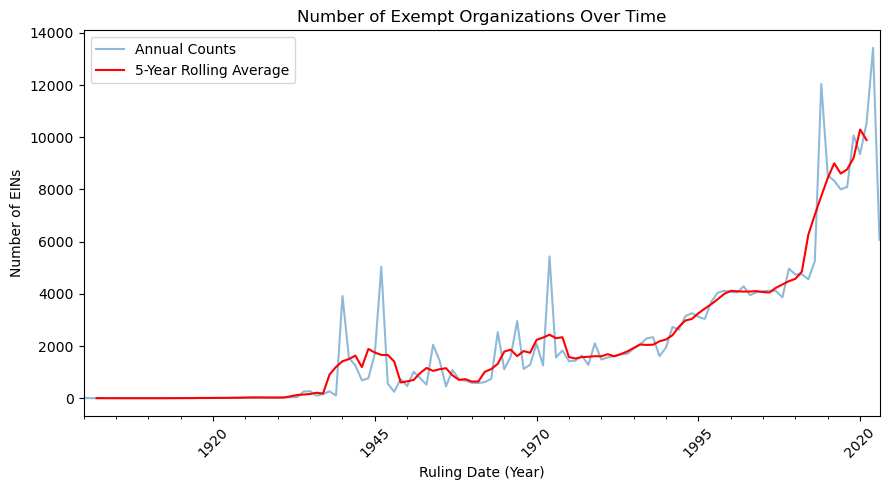

In [78]:
#| label: fig-ruling
#| fig-cap: "Trend Analysis of Ruling Dates for Exempt Organizations"

# Make data copy
ruling_df = df_reg_giv_irs_eo1.copy() 

# Calculate percentage of zeros in RULING col.
pct_of_zeros = ruling_df['RULING'].value_counts().get(0,0)/ruling_df.shape[0]
#print(f"{pct_of_zeros:.2%}")

# Replace zeros with NaN.
ruling_df['RULING'] = ruling_df['RULING'].replace(0, np.nan)

# Convert RULING to str and then datetime.
ruling_df['RULING'] = ruling_df['RULING'].astype(str).str.replace('\.0$', '', regex=True)
ruling_df['RULING'] = pd.to_datetime(ruling_df['RULING'], format='%Y%m', errors='coerce')

# Aggregate data anually.
annual_counts = ruling_df.groupby(pd.Grouper(key='RULING', freq='Y')).size()

# Apply rolling window of 5 years to smooth the data
rolling_counts = annual_counts.rolling(window=5, center=True).mean()

# Plot
plt.figure(figsize=(9, 5))
annual_counts.plot(alpha=0.5, label='Annual Counts')  # Original data
rolling_counts.plot(color='red', label='5-Year Rolling Average')  # Smoothed data
plt.title('Number of Exempt Organizations Over Time')
plt.xlabel('Ruling Date (Year)')
plt.ylabel('Number of EINs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()